In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [57]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('/content/HPG Historical Data.csv', sep=";")
df1=df.reset_index()['Price']

In [58]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [59]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [60]:
print(train_data.shape, test_data.shape)

(1126, 1) (126, 1)


In [61]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
#6. Reshape
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [63]:
# 7. Reshape input to be [samples, features, time steps] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1 ,X_test.shape[1])

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)

(1110, 1, 15)
(1110,)
(110, 1, 15)
(110,)


In [65]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1,15)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 18s 123ms/step - loss: 0.2147 - val_loss: 4.3793e-04
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.0644 - val_loss: 0.0259
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0134 - val_loss: 0.0121
Epoch 4/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0070 - val_loss: 0.0117
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0041 - val_loss: 0.0071
Epoch 6/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0029 - val_loss: 0.0043
Epoch 7/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/100
18/18 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 0

In [67]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [68]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [69]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 10.816527125195073


In [71]:
# Chuyển đổi dữ liệu kiểm tra thành danh sách
x_input = test_data[60:].reshape(1, -1)
temp_input = list(x_input[0])

from numpy import array

lst_output = []
n_steps = 15
i = 0

while i < 30:
    if len(temp_input) > 100:
        # Chuẩn bị dữ liệu đầu vào mới
        x_input = np.array(temp_input[-15:])  # Lấy đúng 100 phần tử cuối cùng
        print("{} day input {}".format(i, x_input))

        x_input = x_input.reshape((1, 1, n_steps))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        # Thêm giá trị dự đoán vào danh sách tạm thời
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:]).reshape((1, 1, n_steps))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i += 1


[0.12811725]
67
[0.12694359]
68
[0.12609869]
69
[0.12597975]
70
[0.12526129]
71
[0.12460616]
72
[0.12361643]
73
[0.12288379]
74
[0.12212779]
75
[0.12136227]
76
[0.1208338]
77
[0.1199864]
78
[0.11917237]
79
[0.11836909]
80
[0.11781064]
81
[0.11712977]
82
[0.11648512]
83
[0.11586402]
84
[0.11523193]
85
[0.11462231]
86
[0.11401722]
87
[0.11343393]
88
[0.11286232]
89
[0.11230721]
90
[0.11176416]
91
[0.11122371]
92
[0.11070231]
93
[0.11019457]
94
[0.10969852]
95
[0.10921042]
96


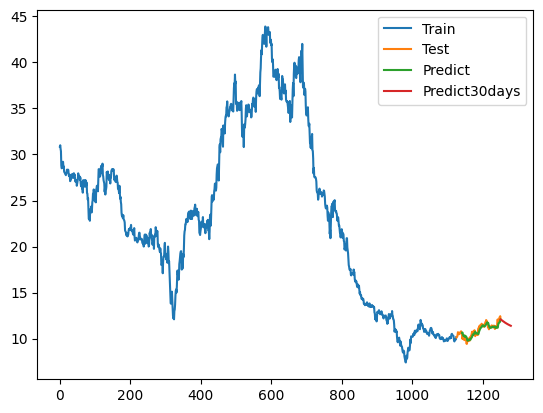

In [72]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+16, stop=train_size+test_size, step=1)
plt.plot(test_data_index, y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [73]:
# Chuyển đổi dữ liệu kiểm tra thành danh sách
x_input = test_data[60:].reshape(1, -1)
temp_input = list(x_input[0])

from numpy import array

lst_output = []
n_steps = 15
i = 0

while i < 60:
    if len(temp_input) > 15:
        # Chuẩn bị dữ liệu đầu vào mới
        x_input = np.array(temp_input[-15:])  # Lấy đúng 100 phần tử cuối cùng
        print("{} day input {}".format(i, x_input))

        x_input = x_input.reshape((1, 1, n_steps))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        # Thêm giá trị dự đoán vào danh sách tạm thời
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.10552571 0.10843109 0.10456639 0.10407302 0.10456639 0.12674049
 0.12819318 0.12336915 0.12290319 0.12432847 0.12578116 0.1344699
 0.13493586 0.13784125 0.12723386]
0 day output [[0.12811725]]
1 day input [0.10843109 0.10456639 0.10407302 0.10456639 0.12674049 0.12819318
 0.12336915 0.12290319 0.12432847 0.12578116 0.1344699  0.13493586
 0.13784125 0.12723386 0.12811725]
1 day output [[0.12694359]]
2 day input [0.10456639 0.10407302 0.10456639 0.12674049 0.12819318 0.12336915
 0.12290319 0.12432847 0.12578116 0.1344699  0.13493586 0.13784125
 0.12723386 0.12811725 0.12694359]
2 day output [[0.12609869]]
3 day input [0.10407302 0.10456639 0.12674049 0.12819318 0.12336915 0.12290319
 0.12432847 0.12578116 0.1344699  0.13493586 0.13784125 0.12723386
 0.12811725 0.12694359 0.12609869]
3 day output [[0.12597975]]
4 day input [0.10456639 0.12674049 0.12819318 0.12336915 0.12290319 0.12432847
 0.12578116 0.1344699  0.13493586 0.13784125 0.12723386 0.12811725
 0.12694359 0.12609

ValueError: x and y must have same first dimension, but have shapes (60,) and (90, 1)

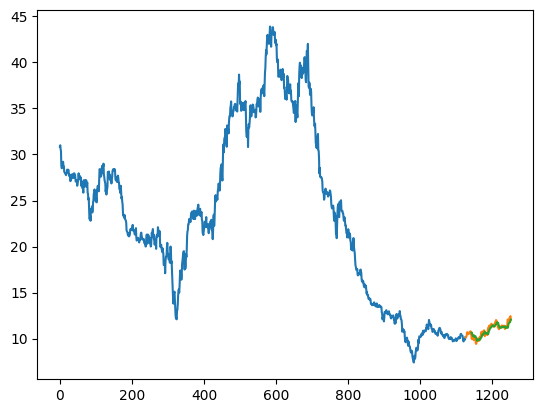

In [75]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

pred_data_index = pd.RangeIndex(start=train_size + 16, stop=train_size + test_size, step=1)
plt.plot(pred_data_index, y_pred, label='Predict')

predict_data_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 59, step=1)

lst_output_flat = np.array(lst_output).reshape(-1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output_flat.reshape(-1, 1)), label='Predict60days')

plt.legend()
plt.show()

In [74]:
# Chuyển đổi dữ liệu kiểm tra thành danh sách
x_input = test_data[60:].reshape(1, -1)
temp_input = list(x_input[0])

from numpy import array

lst_output = []
n_steps = 15
i = 0

while i < 90:
    if len(temp_input) > 15:
        # Chuẩn bị dữ liệu đầu vào mới
        x_input = np.array(temp_input[-15:])  # Lấy đúng 100 phần tử cuối cùng
        print("{} day input {}".format(i, x_input))

        x_input = x_input.reshape((1,1, n_steps))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))

        # Thêm giá trị dự đoán vào danh sách tạm thời
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input).reshape((1,1 ,n_steps))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])

        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))

        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.10552571 0.10843109 0.10456639 0.10407302 0.10456639 0.12674049
 0.12819318 0.12336915 0.12290319 0.12432847 0.12578116 0.1344699
 0.13493586 0.13784125 0.12723386]
0 day output [[0.12811725]]
1 day input [0.10843109 0.10456639 0.10407302 0.10456639 0.12674049 0.12819318
 0.12336915 0.12290319 0.12432847 0.12578116 0.1344699  0.13493586
 0.13784125 0.12723386 0.12811725]
1 day output [[0.12694359]]
2 day input [0.10456639 0.10407302 0.10456639 0.12674049 0.12819318 0.12336915
 0.12290319 0.12432847 0.12578116 0.1344699  0.13493586 0.13784125
 0.12723386 0.12811725 0.12694359]
2 day output [[0.12609869]]
3 day input [0.10407302 0.10456639 0.12674049 0.12819318 0.12336915 0.12290319
 0.12432847 0.12578116 0.1344699  0.13493586 0.13784125 0.12723386
 0.12811725 0.12694359 0.12609869]
3 day output [[0.12597975]]
4 day input [0.10456639 0.12674049 0.12819318 0.12336915 0.12290319 0.12432847
 0.12578116 0.1344699  0.13493586 0.13784125 0.12723386 0.12811725
 0.12694359 0.12609

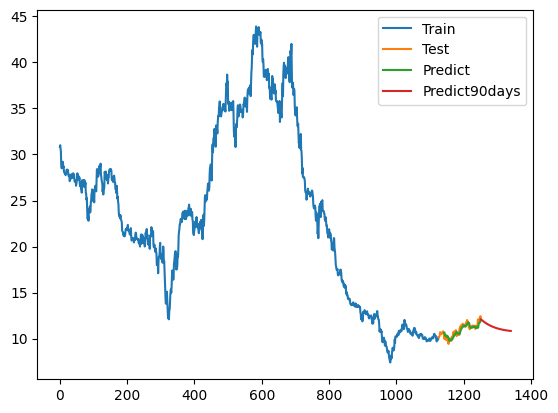

In [76]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Chỉ số cho dữ liệu kiểm tra
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Chỉ số cho dữ liệu dự đoán
pred_data_index = pd.RangeIndex(start=train_size + 16, stop=train_size + test_size, step=1)
plt.plot(pred_data_index, y_pred, label='Predict')

# Chỉ số cho dữ liệu dự báo 90 ngày
predict_data_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 89, step=1)

# Chuyển đổi lst_output thành dạng phù hợp
lst_output_flat = np.array(lst_output).reshape(-1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output_flat.reshape(-1, 1)), label='Predict90days')

# Hiển thị đồ thị
plt.legend()
plt.show()